In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
src = cv2.imread('../segmentation_rsc/flower.jpg')
data = src.reshape((-1, 3)).astype(np.float32)# image를 1차원 벡터로(flattening) 변환해서 kmeans에 사용해야 함.
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)# 클러스터링(meanshift, kmeans 등등)은 hsv가 결과가 더 잘나옴.

In [3]:
K = 5
term_crit = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret, labels, centers = cv2.kmeans(data, K, None, term_crit, 5, cv2.KMEANS_RANDOM_CENTERS)
print("centers.shape=", centers.shape)
print("labels.shape=", labels.shape)
print("ret=", ret)

centers.shape= (5, 3)
labels.shape= (261120, 1)
ret= 292437322.54142284


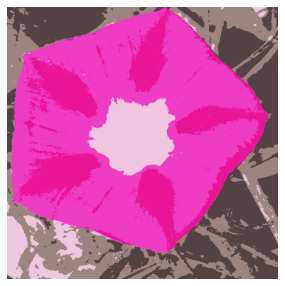

In [4]:
centers = np.uint8(centers)
res = centers[labels.flatten()]
dst = res.reshape(src.shape)
dstrgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (5, 5))
plt.axis('off')
plt.imshow(dstrgb)